In [67]:
import numpy as np
import lightgbm as lgb
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import os
import joblib

In [68]:
# Caricare train_events
with open('train_events.pkl', 'rb') as f:
    train_events = pickle.load(f)

# Caricare y_train
with open('y_train.pkl', 'rb') as f:
    y_train = pickle.load(f)

# Caricare test_events
with open('test_events.pkl', 'rb') as f:
    test_events = pickle.load(f)

# Caricare y_test
with open('y_test.pkl', 'rb') as f:
    y_test = pickle.load(f)

train_events=train_events.drop(columns=8)
test_events=test_events.drop(columns=8)

In [69]:
num_leaves=30
max_depth=-1
learning_rate=0.05
n_estimators=30000
gbm = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=num_leaves, max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators, objective='binary')
gbm.fit(train_events,y_train)
print("Accuracy on testing data:", gbm.score(test_events, y_test))

Accuracy on testing data: 0.955098561920824


In [70]:
k=gbm.predict(test_events, "response")

test_index_list=y_test.index.tolist()

In [71]:
predictions=pd.DataFrame(k,columns=['predictions'])

In [72]:
predictions.index = y_test.index
predicted = pd.concat([predictions, y_test], axis=1)

In [73]:
p_predicted=predicted.loc[predicted[41]==0]
e_predicted=predicted.loc[predicted[41]==1]

In [74]:
with open('p_predicted.pkl', 'wb') as f:
    pickle.dump(p_predicted, f)

with open('e_predicted.pkl', 'wb') as f:
    pickle.dump(e_predicted, f)

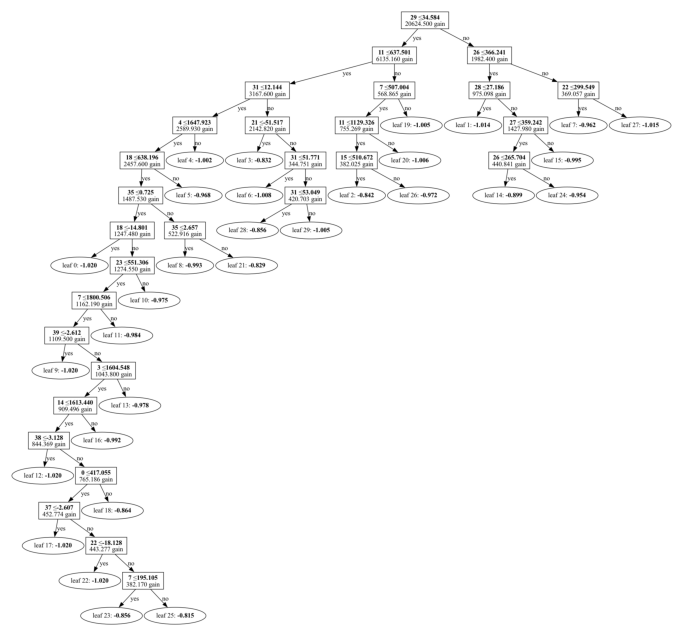

In [75]:
ax = lgb.plot_tree(gbm, tree_index=0, figsize=(20, 8), show_info=['split_gain'],orientation='vertical')
plt.show()

In [76]:
joblib.dump(gbm,'BDT_dataset_2.txt')

['BDT_dataset_2.txt']

In [77]:
# Salva i valori in un file di testo
with open('parameters.txt', 'a') as f:
    f.write(f'num. leaves={num_leaves}'+'\n'+f'n_estimators={n_estimators}'+'\n')